In [148]:
from vtl.Readfile import Readfile
import grizli
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
from astropy import wcs
import matplotlib.pyplot as plt
from matplotlib import gridspec
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [38]:
fp = '/Users/Vince.ec/Clear_data/flt_files/'

flt_list=glob(fp + 'ic*flt.fits')

specflt=[]
photflt=[]
for i in range(len(flt_list)):
    indat=fits.open(flt_list[i])
    if indat[0].header['OBSTYPE'] ==  'SPECTROSCOPIC':
        specflt.append(flt_list[i])
    if indat[0].header['OBSTYPE'] ==  'IMAGING':
        photflt.append(flt_list[i])

In [13]:
def Source_present(fn,ra,dec):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)
    present=False

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    [pos]=w.wcs_world2pix([[ra,dec]],1)



    if -100<pos[0]<xpixlim + 100 and -100<pos[1]<ypixlim + 100:
        present=True

    return present,pos


In [49]:
pres = np.repeat('False',len(specflt))
pos = np.zeros([len(specflt),2])

p_pres = np.repeat('False',len(photflt))
p_pos = np.zeros([len(photflt),2])

for i in range(len(specflt)):
    pres[i],pos[i] = Source_present(specflt[i], 53.041826, -27.725868)
    
for i in range(len(photflt)):
    p_pres[i],p_pos[i] = Source_present(photflt[i], 53.041826, -27.725868)

In [50]:
g_speclist = []
g_pos = []

g_speclist_p = []
g_pos_p = []

for i in range(len(pres)):
    if pres[i] == 'True':
        g_speclist.append(specflt[i])
        g_pos.append(pos[i])
        
for i in range(len(p_pres)):
    if p_pres[i] == 'True':
        g_speclist_p.append(photflt[i])
        g_pos_p.append(p_pos[i])

In [57]:
dat = fits.open(g_speclist_p[0])

In [71]:
g_speclist

['/Users/Vince.ec/Clear_data/flt_files/icxt19o6q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt19o7q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt19oaq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt19ocq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20f7q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20f8q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20fbq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20fdq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21b7q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21b8q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21bcq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21beq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22pmq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22pnq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22pqq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22psq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/i

In [72]:
g_speclist_p

['/Users/Vince.ec/Clear_data/flt_files/icxt19o9q_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt19odq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20faq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt20feq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21baq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt21bfq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22ppq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt22ptq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt23pyq_flt.fits',
 '/Users/Vince.ec/Clear_data/flt_files/icxt23q2q_flt.fits']

In [145]:
flt = grizli.model.GrismFLT(grism_file='/Users/Vince.ec/Clear_data/flt_files/icxt23q1q_flt.fits', 
                            direct_file='/Users/Vince.ec/Clear_data/flt_files/icxt23q2q_flt.fits',
                            pad=200, ref_file=None, ref_ext=0, 
                            seg_file='../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
                            shrink_segimage=False)

/Users/Vince.ec/Clear_data/flt_files/icxt23q2q_flt.fits / blot segmentation ../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


In [150]:
ref_cat = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format='ascii')
sim_cat = flt.blot_catalog(ref_cat, sextractor=False)

(200, 1214)

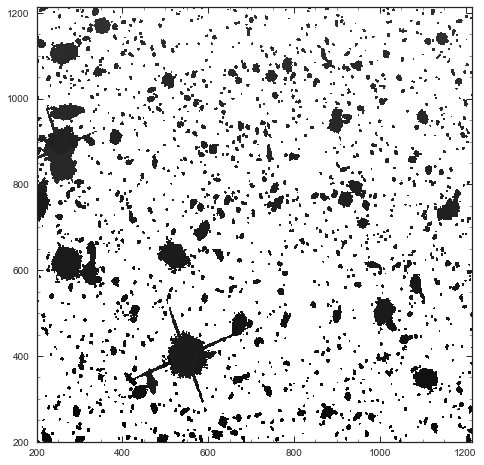

In [152]:
%matplotlib inline
# print('Number of objects in `photutils` catalog: %d' %(len(flt.catalog)))
plt.figure(figsize=[8,8])
plt.imshow(flt.seg, cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

In [134]:
g_pos_p

[array([ -28.6447641 ,  758.02073521]),
 array([ -42.1892098 ,  761.00556783]),
 array([ -76.99219032,  488.37041682]),
 array([ -90.4725554 ,  491.54600567]),
 array([ -76.90766262,  488.39628668]),
 array([ -90.44107418,  491.52817958]),
 array([  68.96229513,  905.34199648]),
 array([  55.52069747,  908.46460959]),
 array([  68.94325052,  905.42603211]),
 array([  55.4422293 ,  908.48483191])]

In [154]:
# Find the object near detector (x,y) = (712, 52) 
xi, yi = 55+flt.pad, 908+flt.pad # nice line

# dr = np.sqrt((flt.catalog['x_flt']-xi)**2+(flt.catalog['y_flt']-yi)**2)
# ix = np.argmin(dr)
# id = flt.catalog['id'][ix]
id = 39170
# mag = flt.catalog['mag'][ix]
# x0 = flt.catalog['x_flt'][ix]+1
# y0 = flt.catalog['y_flt'][ix]+1
# print('   id=%d, (x,y)=(%.1f, %.1f), mag=%.2f' %(id, x0, y0, mag))

## Get properties of the object from the segmentation region alone
## regardless of whether you have the detection catalog
out = grizli.utils_c.disperse.compute_segmentation_limits(flt.seg, id,
                                                          flt.direct.data['SCI'],
                                                          flt.direct.sh)
# ymin, ymax, yseg, xmin, xmax, xseg, area, segm_flux = out
# print('Segment: (x,y)=(%.1f, %.1f) # zero index' %(xseg, yseg))

In [155]:
# x pixels from the center of the direct image
dx = np.arange(220)
# ytrace and wavelength at x=dx
dy, lam = flt.conf.get_beam_trace(x=x0-flt.pad, y=y0-flt.pad, dx=dx, beam='A')

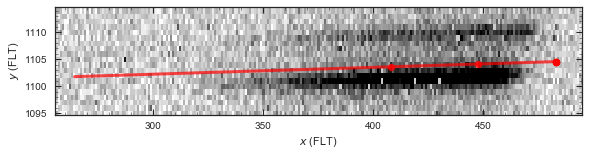

In [156]:

### Make a figure showing the trace in the FLT frame
fig = plt.figure(figsize=[8,2])

ax = fig.add_subplot(111)
ax.imshow(flt.grism.data['SCI'], cmap='gray_r', vmin=-0.05, vmax=0.2, 
          interpolation='Nearest', aspect='auto')
ax.set_xlim(x0-10, x0+230); ax.set_ylim(y0-10, y0+10)

# plot the trace
ax.plot(x0+dx-1, y0+dy-1, color='red', linewidth=3, alpha=0.7)
## 0.1 micron tick marks along the trace as in the next figure
xint = np.interp(np.arange(1,1.81,0.1), lam/1.e4, dx)
yint = np.interp(np.arange(1,1.81,0.1), lam/1.e4, dy)
ax.scatter(x0+xint-1, y0+yint-1, marker='o', color='red', alpha=0.8)
ax.set_xlabel(r'$x$ (FLT)'); ax.set_ylabel(r'$y$ (FLT)')

fig.tight_layout(pad=0.1)

These should be the same: 129.204 129.204


(200, 1214)

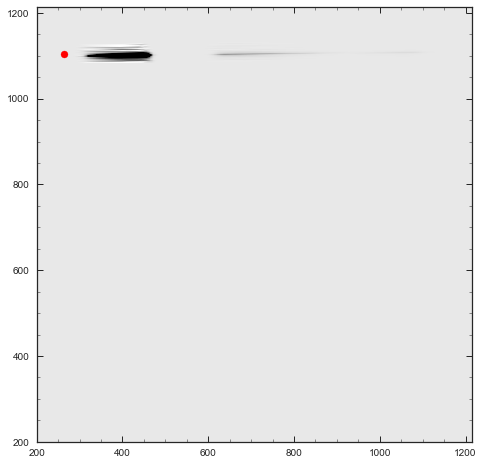

In [157]:
import collections
import time

### Make sure these are initialized
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

### Compute model of a single object and catch the output, mag=-1 will force compute all orders
single_model = flt.compute_model_orders(id=id, compute_size=True, mag=-1, in_place=False)

### The other option is to store the model "in place" in the `flt.model` attribute.
status = flt.compute_model_orders(id=id, compute_size=True, mag=-1, in_place=True)
print('These should be the same: %.3f %.3f' %(single_model[1].sum(), flt.model.sum()))

## Show it
plt.figure(figsize=[8,8])
plt.imshow(single_model[1]*10, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

plt.scatter(xseg, yseg, marker='o', color='r') # position in direct image

plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

In [158]:
## Only fit objects brighter than 26th mag (AB)
# keep = flt.catalog['mag'] < 26

## Reset
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

## Helper function that loops over `self.compute_model_orders` for many objects
## Result is stored in the `self.model` attribute.
t0 = time.time()
flt.compute_full_model(ids=flt.catalog['id'], 
                       mags=flt.catalog['mag'])

t1 = time.time()
print('Compute full model (%d objects): %.2f sec' %(keep.sum(), (t1-t0)*1))

TypeError: 'NoneType' object has no attribute '__getitem__'

In [140]:
t0 = time.time()
flt.compute_full_model(ids=flt.catalog['id'][keep], 
                       mags=flt.catalog['mag'][keep])

t1 = time.time()
print('Compute full model *again* (%d objects): %.2f sec' %(keep.sum(), (t1-t0)*1))


Compute full model *again* (1427 objects): 5.83 sec


(200, 1214)

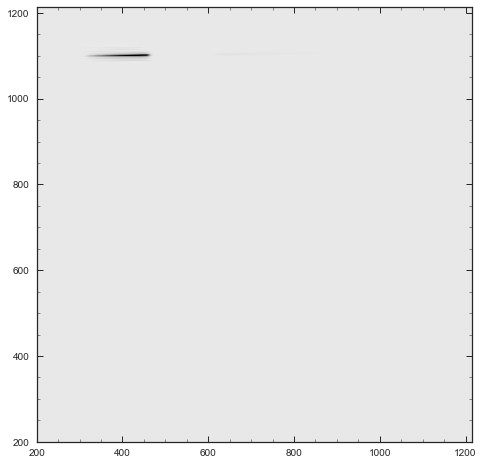

In [167]:
plt.figure(figsize=[8,8])
plt.imshow(flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

(200, 1214)

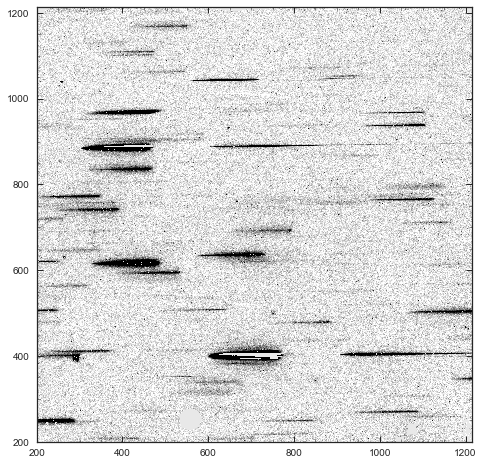

In [166]:

# residual
plt.figure(figsize=[8,8])

plt.imshow(flt.grism.data['SCI'] - flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)
# Note, some spectra on the left side of the image aren't modeled because they fall off of 
# the direct image.  This can be accounted for when using reference mosaics that cover areas 
# larger than the FLT frames themselves.

# Also, this is just a crude model with simple (wrong) assumptions about the shapes of the object spectra!

('Spectral orders: ', OrderedDict([('A', <grizli.model.GrismDisperser object at 0x11725bc90>), ('B', <grizli.model.GrismDisperser object at 0x11725b650>), ('C', <grizli.model.GrismDisperser object at 0x11725ba50>), ('D', <grizli.model.GrismDisperser object at 0x11725b450>), ('E', <grizli.model.GrismDisperser object at 0x117246290>)]))
(64, 124)
(64, 271)


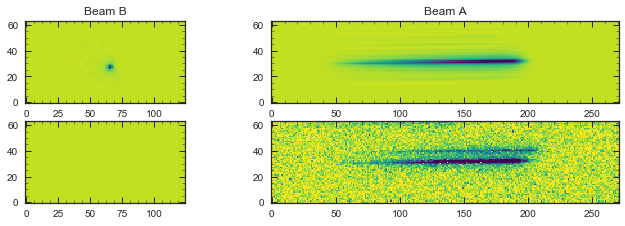

In [160]:

### Re-run again to make sure beams are stored, in case didn't run the full loop as above
if id not in flt.object_dispersers:
    flt.compute_model_orders(id=id, compute_size=True, mag=-1, store=True)

### Get the beams/orders
beams = flt.object_dispersers[id]
print('Spectral orders: ', beams)

### Make a figure showing the model (top) and observed (bottom) spectra
### for the first and zeroth orders.
fig = plt.figure(figsize=[10,3])
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,3.4],
                       height_ratios=[1,1])

for i, b in enumerate(['B','A']):
    beam = beams[b]
    print(beam.sh_beam)
    
    model = beam.compute_model(id=id, spectrum_1d=beam.spectrum_1d, in_place=False)
    vmax = model.max()
    
    #ax = fig.add_subplot(221+i)
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(model.reshape(beam.sh_beam), interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)
    
    ax.set_title('Beam %s' %(b))
    
    ### Cutout of observed data
    sci_cutout = beam.cutout_from_full_image(flt.grism.data['SCI'])
    ax = fig.add_subplot(gs[1,i]) #fig.add_subplot(223+i)
    ax.imshow(sci_cutout, interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)

fig.tight_layout(pad=0.1)

Available computed beams/orders for id=39170: ['A', 'B', 'C', 'D', 'E']

`beam` class: <class 'grizli.model.GrismDisperser'>

`co` class: <class 'grizli.model.BeamCutout'>

Object 39170, total flux density within the segmentation region: 4.673e-18 erg/s/cm2/A


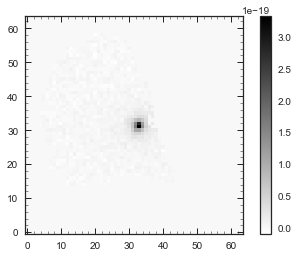

In [159]:
reload(grizli.model)
print('Available computed beams/orders for id=%d: %s\n' %(id, flt.object_dispersers[id].keys()))
beam = flt.object_dispersers[id]['A'] # can choose other orders if available
beam.compute_model()
print('`beam` class: %s\n' %(beam.__class__))

### BeamCutout object
co = grizli.model.BeamCutout(flt, beam, conf=flt.conf)
print('`co` class: %s\n' %(co.__class__))

print('Object %d, ' %(co.id) +
      'total flux density within the segmentation region: %.3e erg/s/cm2/A'%(co.beam.total_flux))
    
### Show the direct image
plt.imshow(co.beam.direct*(co.beam.seg == id), interpolation='Nearest', cmap='gray_r', origin='lower')
plt.colorbar()

In [163]:
### Can write the BeamCutout object to a normal FITS file
co.write_fits(root='galaxy', clobber=True)

'galaxy_39170.g102.A.fits'

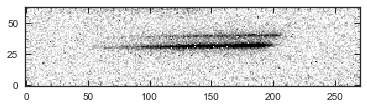

In [164]:
# Show the spectrum cutout
plt.imshow(co.grism.data['SCI'], interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

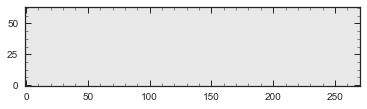

In [165]:
# Show the contamination model, which was cutout of `flt.model`
plt.imshow(co.contam, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')